# <center> End-to-End Project- Credit Risk

## Problem Description

### TASK 1: Exploratory Data Analysis

###  Importing Libraries 

In [63]:
import numpy as np                                                        # For pre-preocessing data
import pandas as pd                                                       # For pre-preocessing data
import matplotlib.pyplot as plt                                           # For visualisation
%matplotlib inline
import seaborn as sns                                                     # For visualisation

pd.set_option('display.max_rows', 250)                                    # to show upto 250 rows in output
pd.set_option('display.max_colwidth',250)                                 # to show upto 250 cols in output
pd.set_option('display.float_format', lambda x: '%.5f' % x)               # customised format for pandas dataframe output


import warnings
warnings.filterwarnings('ignore')                                        # To supress warnings


### Loading Data

In [64]:
# imporitng data to a pandas dataframe
applicant_data = pd.read_csv("applicant.csv")
loan_data = pd.read_csv("loan.csv")

In [65]:
# top 5 rows
applicant_data.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0


In [66]:
# top 5 rows
loan_data.head()

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,1469590,6,electronic equipment,1169000,4,real estate,0,0,NaN,2,critical/pending loans at other banks,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,1203873,48,electronic equipment,5951000,2,real estate,0,0,NaN,1,existing loans paid back duly till now,1
2,d68d995c-edad-11ea-814a-1b6716782575,1432761,12,education,2096000,2,real estate,0,0,NaN,1,critical/pending loans at other banks,0
3,d68d99fc-edad-11ea-8841-17e8848060ae,1207582,42,FF&E,7882000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
4,d68d9a92-edad-11ea-9f3d-1f8682db006a,1674436,24,new vehicle,4870000,3,NaN,0,0,NaN,2,delay in paying off loans in the past,1


### Data Dictionary

- 0 = Low credit risk i.e high chance of paying back the loan amount
- 1 = High credit risk i.e low chance of paying back the loan amount

1. applicant_data : This file contains personal data about the (primary) applicant

    - Unique ID: applicant_id (string)

    - Other fields:

        - Primary_applicant_age_in_years (numeric)
        - Gender (string)
        - Marital_status (string)
        - Number_of_dependents (numeric)
        - Housing (string)
        - Years_at_current_residence (numeric)
        - Employment_status (string)
        - Has_been_employed_for_at_least (string)
        - Has_been_employed_for_at_most (string)
        - Telephone (string)
        - Foreign_worker (numeric)
        - Savings_account_balance (string)
        - Balance_in_existing_bank_account_(lower_limit_of_bucket) (string)
        - Balance_in_existing_bank_account_(upper_limit_of_bucket) (string)


2. loan_data : This file contains data more specific to the loan application
    - Target: high_risk_application (numeric)
    - Other fields:
        - applicant_id (string)
        - Months_loan_taken_for (numeric)
        - Purpose (string)
        - Principal_loan_amount (numeric)
        - EMI_rate_in_percentage_of_disposable_income (numeric)
        - Property (string)
        - Has_coapplicant (numeric)
        - Has_guarantor (numeric)
        - Other_EMI_plans (string)
        - Number_of_existing_loans_at_this_bank (numeric)
        - Loan_history (string)


### Preprocessing Data 

### 1. applicant_data

In [67]:
# Checking for missing values
applicant_data .isnull().sum()

applicant_id                                                  0
Primary_applicant_age_in_years                                0
Gender                                                        0
Marital_status                                                0
Number_of_dependents                                          0
Housing                                                       0
Years_at_current_residence                                    0
Employment_status                                             0
Has_been_employed_for_at_least                               62
Has_been_employed_for_at_most                               253
Telephone                                                   596
Foreign_worker                                                0
Savings_account_balance                                     183
Balance_in_existing_bank_account_(lower_limit_of_bucket)    668
Balance_in_existing_bank_account_(upper_limit_of_bucket)    457
dtype: int64

**Observation:** There are many null values in applicant data. We can check percentage of null value in dataset and delete the columns having more than 45% of null value. 

Note: There is no any specific criteria for delete the columns having null values. It's totally depends on business demand.

In [68]:
100*applicant_data.isnull().sum()/len(applicant_data)

applicant_id                                                0.00000
Primary_applicant_age_in_years                              0.00000
Gender                                                      0.00000
Marital_status                                              0.00000
Number_of_dependents                                        0.00000
Housing                                                     0.00000
Years_at_current_residence                                  0.00000
Employment_status                                           0.00000
Has_been_employed_for_at_least                              6.20000
Has_been_employed_for_at_most                              25.30000
Telephone                                                  59.60000
Foreign_worker                                              0.00000
Savings_account_balance                                    18.30000
Balance_in_existing_bank_account_(lower_limit_of_bucket)   66.80000
Balance_in_existing_bank_account_(upper_limit_of

In [69]:
# deleting columns having 20% null data
null_data = pd.DataFrame({'% of null data':100*applicant_data.isnull().sum()/len(applicant_data)} )
null_data = null_data[null_data['% of null data']<=20]
null_data.index

Index(['applicant_id', 'Primary_applicant_age_in_years', 'Gender',
       'Marital_status', 'Number_of_dependents', 'Housing',
       'Years_at_current_residence', 'Employment_status',
       'Has_been_employed_for_at_least', 'Foreign_worker',
       'Savings_account_balance'],
      dtype='object')

In [70]:
# new applicant data
applicant_data_1 = applicant_data[null_data.index].copy()
applicant_data_1.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Foreign_worker,Savings_account_balance
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,1,NaN
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,1,Low
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,1,Low
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,1,Low
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,1,Low


In [71]:
# Chaking duplicate values

applicant_data_1.duplicated().sum()

0

We can see that there is no duplicate data present in applicant data.

#### Imputing null values

In [72]:
# let's check data having null values 
null_data[null_data['% of null data']>0]

,% of null data
Has_been_employed_for_at_least,6.20000
Savings_account_balance,18.30000


In above table we can see that there is 3 columns having null value. We can impute this null value by taking mode.

In [73]:
def fill_nan(col):                                                         # function that takes column as parameter
    na_value = applicant_data_1[col].mode()[0]                             # calculating mode of column
    applicant_data_1[col] = applicant_data_1[col].fillna(na_value, axis=0) # impute null value by mode
    return applicant_data_1[col].isnull().sum()                            # returns sum of null value after imputation

In [74]:
fill_nan('Has_been_employed_for_at_least')

0

In [75]:
fill_nan('Savings_account_balance')

0

#### Data Cleaning

In [76]:
applicant_data_1.columns

Index(['applicant_id', 'Primary_applicant_age_in_years', 'Gender',
       'Marital_status', 'Number_of_dependents', 'Housing',
       'Years_at_current_residence', 'Employment_status',
       'Has_been_employed_for_at_least', 'Foreign_worker',
       'Savings_account_balance'],
      dtype='object')

##### 'Marital_status' Column


In [77]:
applicant_data_1[['Marital_status', 'Gender']].value_counts()

Marital_status              Gender
single                      male      548
divorced/separated/married  female    310
married/widowed             male       92
divorced/separated          male       50
dtype: int64

In [78]:
applicant_data_1.groupby('Marital_status')['Gender'].value_counts()

Marital_status              Gender
divorced/separated          male       50
divorced/separated/married  female    310
married/widowed             male       92
single                      male      548
Name: Gender, dtype: int64

In [79]:
l = []                                                              # creating empty list
for i in applicant_data_1['Marital_status']:
    if i == 'divorced/separated/married':                           
        l.append('separated')
    elif i == 'divorced/separated':
        l.append('separated')
    elif i == 'married/widowed':
        l.append('married')
    else:
        l.append(i) 
l[:5]

['single', 'separated', 'single', 'single', 'single']

In [80]:
applicant_data_1['Marital_status'] = l                       # update old Marital_status with new values store in list l

##### "Housing" Column

In [81]:
applicant_data_1['Housing'].unique()                         # check unique value present in a column

array(['own', 'for free', 'rent'], dtype=object)

In [82]:
applicant_data_1['Housing'] = applicant_data_1['Housing'].apply(
    lambda x: x.replace('for free', 'free'))             
                                                           # apply lambda function to replace 'for free' by 'free'

applicant_data_1['Housing'].unique()                       # check unique value present in a column after cleaning

array(['own', 'free', 'rent'], dtype=object)

##### "Employment_status" column

In [83]:
applicant_data_1['Employment_status'].unique()

array(['skilled employee / official', 'unskilled - resident',
       'management / self-employed / highly qualified employee / officer',
       'unemployed / unskilled - non-resident'], dtype=object)

In [84]:
x = []
for i in applicant_data_1['Employment_status']:
    if i =='skilled employee / official':
        x.append('employee')
    elif i == 'management / self-employed / highly qualified employee / officer':
        x.append('qualified employee')
    elif i == 'unemployed / unskilled - non-resident':
        x.append('unemployed')
    else:
        x.append(i)
applicant_data_1['Employment_status'] = x
applicant_data_1['Employment_status'].unique()

array(['employee', 'unskilled - resident', 'qualified employee',
       'unemployed'], dtype=object)

##### "Has_been_employed_for_at_least" column

In [85]:
applicant_data_1['Has_been_employed_for_at_least'].unique()

array(['7 years', '1 year', '4 years', '0 year'], dtype=object)

In [86]:
applicant_data_1['Has_been_employed_for_at_least (year)'] = applicant_data_1[
    'Has_been_employed_for_at_least'].apply(
        lambda x: x.strip(' years') or x.strip(' year'))                         # remove year or years from the data 
          
applicant_data_1['Has_been_employed_for_at_least (year)'].unique()

array(['7', '1', '4', '0'], dtype=object)

In [87]:
# Convert data type in int64
applicant_data_1['Has_been_employed_for_at_least (year)'] = applicant_data_1[
    'Has_been_employed_for_at_least (year)'].astype(int)

type(applicant_data_1['Has_been_employed_for_at_least (year)'][0])              # check data type of data

numpy.int32

In [88]:
# final data looks like

applicant_data_1.sample(20)

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Foreign_worker,Savings_account_balance,Has_been_employed_for_at_least (year)
530,1666376,32,male,single,2,own,1,employee,4 years,1,Low,4
188,1460398,20,male,married,1,own,1,employee,4 years,1,Medium,4
428,1657309,20,male,single,1,own,4,employee,7 years,1,Low,7
629,1679090,64,male,single,1,own,4,unskilled - resident,7 years,1,Low,7
194,1807486,21,male,single,1,rent,4,employee,1 year,1,Medium,1
387,1900089,40,male,single,1,own,4,qualified employee,1 year,1,Low,1
670,1844813,27,male,single,1,own,3,unskilled - resident,1 year,1,Medium,1
497,1611295,40,male,single,1,own,3,employee,4 years,1,Low,4
734,1221330,37,female,separated,2,own,1,employee,4 years,1,Low,4
666,1401525,34,male,single,2,own,2,employee,1 year,1,Very high,1


In [89]:
applicant_data_1.shape

(1000, 12)

In [90]:
applicant_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype 
---  ------                                 --------------  ----- 
 0   applicant_id                           1000 non-null   int64 
 1   Primary_applicant_age_in_years         1000 non-null   int64 
 2   Gender                                 1000 non-null   object
 3   Marital_status                         1000 non-null   object
 4   Number_of_dependents                   1000 non-null   int64 
 5   Housing                                1000 non-null   object
 6   Years_at_current_residence             1000 non-null   int64 
 7   Employment_status                      1000 non-null   object
 8   Has_been_employed_for_at_least         1000 non-null   object
 9   Foreign_worker                         1000 non-null   int64 
 10  Savings_account_balance                1000 non-null   object
 11  Has_been_employed_

<center>=//=

### loan_data:

In [91]:
loan_data.sample(20)

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
591,d68ee28a-edad-11ea-a4ea-22a8a3c381dc,1612355,24,new vehicle,1965000,4,car or other,0,0,NaN,2,delay in paying off loans in the past,0
568,d68ed66e-edad-11ea-9e7a-15131b34d922,1754897,48,electronic equipment,3979000,4,car or other,0,0,NaN,2,existing loans paid back duly till now,0
939,d68f9f0e-edad-11ea-9adb-3159059da68e,1230532,24,used vehicle,6842000,2,building society savings agreement/life insurance,0,0,NaN,2,critical/pending loans at other banks,0
336,d68e4bf4-edad-11ea-a6db-2a7c75671381,1742101,13,electronic equipment,2101000,2,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,0
738,d68f310e-edad-11ea-a518-3e596ace1832,1165210,6,new vehicle,6761000,1,NaN,0,0,NaN,2,critical/pending loans at other banks,0
410,d68e7f48-edad-11ea-ae4e-350dc26847f1,1465874,24,electronic equipment,1967000,4,car or other,0,0,NaN,1,existing loans paid back duly till now,0
194,d68e0022-edad-11ea-9d70-3c103640d5c9,1807486,45,electronic equipment,3031000,4,building society savings agreement/life insurance,0,1,NaN,1,existing loans paid back duly till now,1
62,d68db9be-edad-11ea-ba32-040aa726f1e3,1825757,36,business,1953000,4,NaN,0,0,NaN,1,no loans taken/all loans paid back duly,1
255,d68e2098-edad-11ea-9e1e-41d5d9e7b728,1656238,60,electronic equipment,7418000,1,real estate,0,0,NaN,1,delay in paying off loans in the past,0
876,d68f7ef2-edad-11ea-92f3-2d94a292ed64,1860396,18,electronic equipment,1940000,3,NaN,1,0,bank,1,all loans at this bank paid back duly,0


#### Imputing Null Value

In [92]:
loan_data.shape

(1000, 13)

In [93]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   loan_application_id                          1000 non-null   object
 1   applicant_id                                 1000 non-null   int64 
 2   Months_loan_taken_for                        1000 non-null   int64 
 3   Purpose                                      988 non-null    object
 4   Principal_loan_amount                        1000 non-null   int64 
 5   EMI_rate_in_percentage_of_disposable_income  1000 non-null   int64 
 6   Property                                     846 non-null    object
 7   Has_coapplicant                              1000 non-null   int64 
 8   Has_guarantor                                1000 non-null   int64 
 9   Other_EMI_plans                              186 non-null    object
 10  Number_of_exi

In [94]:
100 * loan_data.isnull().sum()/len(loan_data)

loan_application_id                            0.00000
applicant_id                                   0.00000
Months_loan_taken_for                          0.00000
Purpose                                        1.20000
Principal_loan_amount                          0.00000
EMI_rate_in_percentage_of_disposable_income    0.00000
Property                                      15.40000
Has_coapplicant                                0.00000
Has_guarantor                                  0.00000
Other_EMI_plans                               81.40000
Number_of_existing_loans_at_this_bank          0.00000
Loan_history                                   0.00000
high_risk_applicant                            0.00000
dtype: float64

In [95]:
loan_data.drop('Other_EMI_plans', axis=1, inplace=True)          # Other_EMI_plans has more than 80% null data. droping it.

In [96]:
loan_data.isnull().sum()

loan_application_id                              0
applicant_id                                     0
Months_loan_taken_for                            0
Purpose                                         12
Principal_loan_amount                            0
EMI_rate_in_percentage_of_disposable_income      0
Property                                       154
Has_coapplicant                                  0
Has_guarantor                                    0
Number_of_existing_loans_at_this_bank            0
Loan_history                                     0
high_risk_applicant                              0
dtype: int64

In [97]:
loan_data['Purpose'].mode()

0    electronic equipment
Name: Purpose, dtype: object

In [98]:
loan_data['Property'].mode()

0    car or other
Name: Property, dtype: object

In [99]:
def fill_nan(col):                                                         # function that takes column as parameter
    na_value = loan_data[col].mode()[0]                                    # calculating mode of column
    loan_data[col] = loan_data[col].fillna(na_value, axis=0)               # impute null value by mode
    return loan_data[col].isnull().sum()                                   # returns sum of null value after imputation

In [100]:
fill_nan('Purpose')

0

In [101]:
fill_nan('Property')

0

In [102]:
loan_data.isnull().sum() 

loan_application_id                            0
applicant_id                                   0
Months_loan_taken_for                          0
Purpose                                        0
Principal_loan_amount                          0
EMI_rate_in_percentage_of_disposable_income    0
Property                                       0
Has_coapplicant                                0
Has_guarantor                                  0
Number_of_existing_loans_at_this_bank          0
Loan_history                                   0
high_risk_applicant                            0
dtype: int64

In [103]:
loan_data.columns

Index(['loan_application_id', 'applicant_id', 'Months_loan_taken_for',
       'Purpose', 'Principal_loan_amount',
       'EMI_rate_in_percentage_of_disposable_income', 'Property',
       'Has_coapplicant', 'Has_guarantor',
       'Number_of_existing_loans_at_this_bank', 'Loan_history',
       'high_risk_applicant'],
      dtype='object')

In [104]:
loan_data['Loan_history'].value_counts()

existing loans paid back duly till now     530
critical/pending loans at other banks      293
delay in paying off loans in the past       88
all loans at this bank paid back duly       49
no loans taken/all loans paid back duly     40
Name: Loan_history, dtype: int64

In [105]:
df = applicant_data_1.merge(loan_data,on = 'applicant_id')          # final data
df.sample(10)

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Foreign_worker,...,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
232,1720597,35,male,single,1,own,1,employee,4 years,1,...,12,electronic equipment,2141000,3,car or other,0,0,1,existing loans paid back duly till now,0
161,1460273,30,female,separated,1,own,1,employee,0 year,1,...,18,new vehicle,1055000,4,building society savings agreement/life insurance,0,0,2,critical/pending loans at other banks,0
642,1156429,40,male,single,1,own,2,qualified employee,1 year,1,...,15,education,4623000,3,building society savings agreement/life insurance,0,0,1,existing loans paid back duly till now,1
284,1856693,37,male,separated,1,own,2,employee,0 year,1,...,24,new vehicle,3878000,4,car or other,0,0,1,critical/pending loans at other banks,0
425,1581463,21,male,married,1,rent,3,employee,1 year,1,...,18,used vehicle,2779000,1,car or other,0,0,1,existing loans paid back duly till now,0
918,1214474,33,male,separated,1,own,1,employee,1 year,1,...,24,FF&E,2359000,1,building society savings agreement/life insurance,0,0,1,existing loans paid back duly till now,1
746,1391686,23,female,separated,1,rent,4,employee,1 year,1,...,15,new vehicle,2511000,1,car or other,0,0,1,existing loans paid back duly till now,0
843,1209302,50,male,single,1,own,4,employee,4 years,1,...,24,business,1559000,4,car or other,0,0,1,all loans at this bank paid back duly,0
941,1233898,31,male,single,2,own,2,unskilled - resident,1 year,0,...,10,new vehicle,1546000,3,real estate,0,0,1,existing loans paid back duly till now,0
342,1182073,25,male,married,1,rent,3,employee,0 year,1,...,18,electronic equipment,3213000,1,real estate,0,0,1,existing loans paid back duly till now,0


In [106]:
df.shape

(1000, 23)

In [107]:
df.columns

Index(['applicant_id', 'Primary_applicant_age_in_years', 'Gender',
       'Marital_status', 'Number_of_dependents', 'Housing',
       'Years_at_current_residence', 'Employment_status',
       'Has_been_employed_for_at_least', 'Foreign_worker',
       'Savings_account_balance', 'Has_been_employed_for_at_least (year)',
       'loan_application_id', 'Months_loan_taken_for', 'Purpose',
       'Principal_loan_amount', 'EMI_rate_in_percentage_of_disposable_income',
       'Property', 'Has_coapplicant', 'Has_guarantor',
       'Number_of_existing_loans_at_this_bank', 'Loan_history',
       'high_risk_applicant'],
      dtype='object')

In [108]:
df.drop('loan_application_id', axis=1, inplace=True)

In [109]:
cat_features = df.select_dtypes(include='object').columns
cat_features

Index(['Gender', 'Marital_status', 'Housing', 'Employment_status',
       'Has_been_employed_for_at_least', 'Savings_account_balance', 'Purpose',
       'Property', 'Loan_history'],
      dtype='object')

In [110]:
def val_cnt(col):
    return df[col].value_counts()

In [111]:
for i in cat_features:
    print("\t\tColumn: {}".format(i))
    print("\n{}".format(val_cnt(i)))
    print("="*40)

		Column: Gender

male      690
female    310
Name: Gender, dtype: int64
		Column: Marital_status

single       548
separated    360
married       92
Name: Marital_status, dtype: int64
		Column: Housing

own     713
rent    179
free    108
Name: Housing, dtype: int64
		Column: Employment_status

employee                630
unskilled - resident    200
qualified employee      148
unemployed               22
Name: Employment_status, dtype: int64
		Column: Has_been_employed_for_at_least

1 year     401
7 years    253
4 years    174
0 year     172
Name: Has_been_employed_for_at_least, dtype: int64
		Column: Savings_account_balance

Low          786
Medium       103
High          63
Very high     48
Name: Savings_account_balance, dtype: int64
		Column: Purpose

electronic equipment    292
new vehicle             234
FF&E                    181
used vehicle            103
business                 97
education                50
repair costs             22
domestic appliances      12
career dev

### EDA | Univariate Analysis - Continuous Variables 

Below function plots a  graph for univariate analysis of all continuous features 
Distribution, central tendency and outliers can be analysed 

Iterating the function over all Continuous features, to plot the Univariate graphs -

In [112]:
num_col = df.select_dtypes(include=np.number)
num_col.head()

,applicant_id,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Foreign_worker,Has_been_employed_for_at_least (year),Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,high_risk_applicant
0,1469590,67,1,4,1,7,6,1169000,4,0,0,2,0
1,1203873,22,1,2,1,1,48,5951000,2,0,0,1,1
2,1432761,49,2,3,1,4,12,2096000,2,0,0,1,0
3,1207582,45,2,4,1,4,42,7882000,2,0,1,1,0
4,1674436,53,2,4,1,1,24,4870000,3,0,0,2,1


In [113]:
num_col.iloc[:,5:7]


,Has_been_employed_for_at_least (year),Months_loan_taken_for
0,7,6
1,1,48
2,4,12
3,4,42
4,1,24
...,...,...
995,4,12
996,1,30
997,7,12
998,1,45


In [114]:
num_col[num_col.iloc[:,5]==7]

,applicant_id,Primary_applicant_age_in_years,Number_of_dependents,Years_at_current_residence,Foreign_worker,Has_been_employed_for_at_least (year),Months_loan_taken_for,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Has_coapplicant,Has_guarantor,Number_of_existing_loans_at_this_bank,high_risk_applicant
0,1469590,67,1,4,1,7,6,1169000,4,0,0,2,0
6,1428822,53,1,4,1,7,24,2835000,3,0,0,1,0
13,1172292,60,1,4,1,7,24,1199000,4,0,0,2,1
16,1193245,53,1,4,1,7,24,2424000,4,0,0,2,0
18,1250076,44,1,2,1,7,24,12579000,4,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
978,1825579,47,2,4,1,7,24,2538000,4,0,0,2,1
989,1866309,48,1,2,1,7,24,1743000,4,0,0,2,0
991,1365267,34,2,4,1,7,15,1569000,4,0,0,1,0
994,1615010,50,1,3,1,7,12,2390000,4,0,0,1,0


In [115]:
def univariate(data_univariate):

    Name=data_univariate.name
    fig,(ax_boxplot,ax_distplot)  =plt.subplots(nrows=2,sharex=True,gridspec_kw = {"height_ratios": (.20, .80)},figsize=(15, 5))
    

    sns.set_theme(style="white")                                           # set background as white for clean plot
    fig.suptitle("Univariate Plots : "+ Name  , fontsize=15, fontweight='bold')
    sns.boxplot(x=data_univariate,showmeans=True, orient='h',color="violet",ax=ax_boxplot)  # Plot boxplot
    ax_boxplot.set(xlabel='')         
    sns.despine(top=True,right=True,left=True)                                      # this removes side borders
    sns.distplot(data_univariate,kde=False,color='blue',ax=ax_distplot)            # plot distplot
    
    mean=data_univariate.mean()
    median=data_univariate.median()
    mode=data_univariate.mode().tolist()[0]
    ax_distplot.axvline(mean, color='r', linestyle='--',linewidth=2)              # plot mean line
    ax_distplot.axvline(median, color='g', linestyle='-',linewidth=2)               # plot median line
    ax_distplot.axvline(mode, color='y', linestyle='-',linewidth=2)               # plot mode line
    plt.legend({'Mean':mean,'Median':median,'Mode':mode})
                    

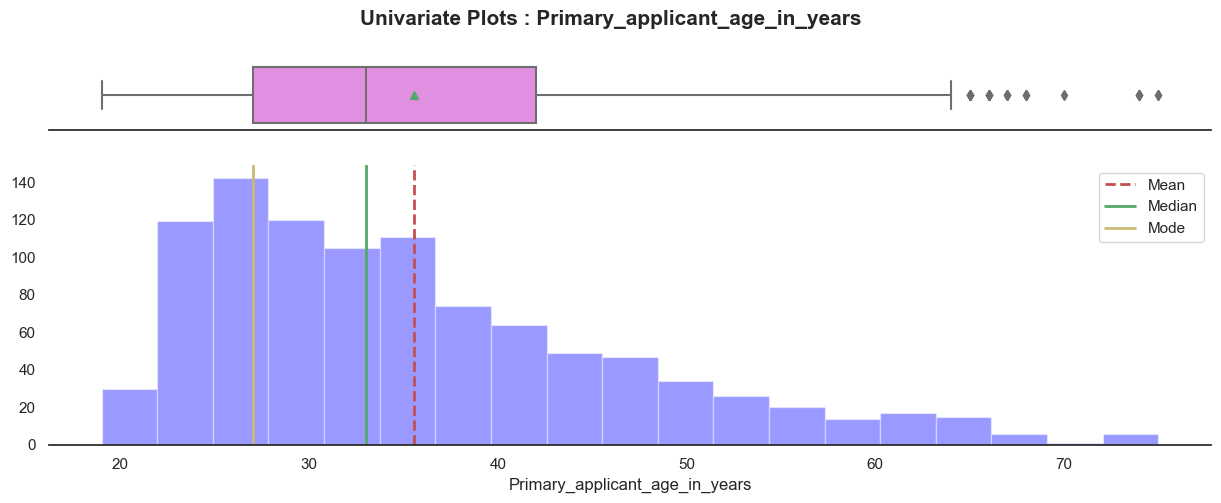

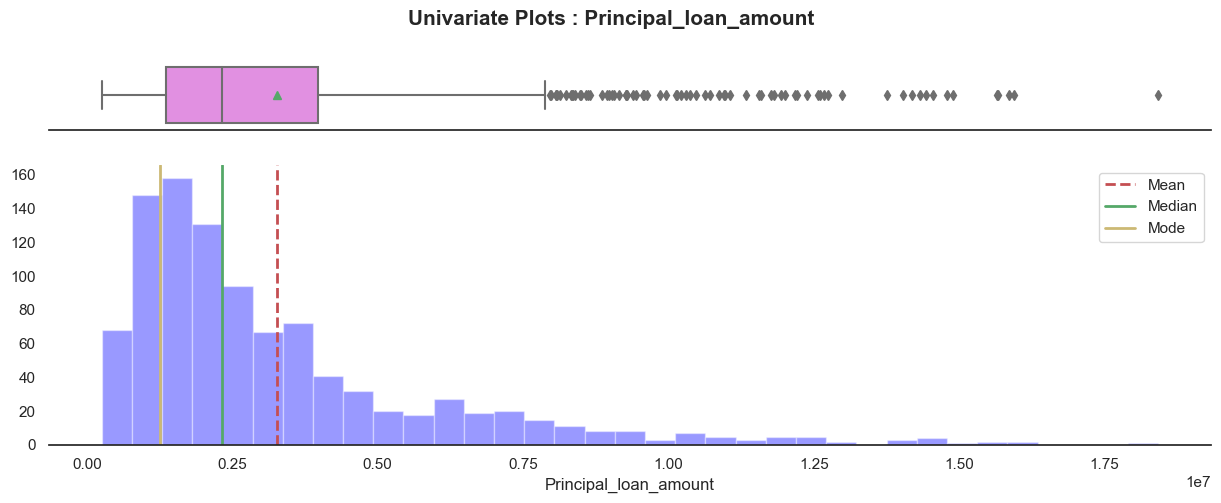

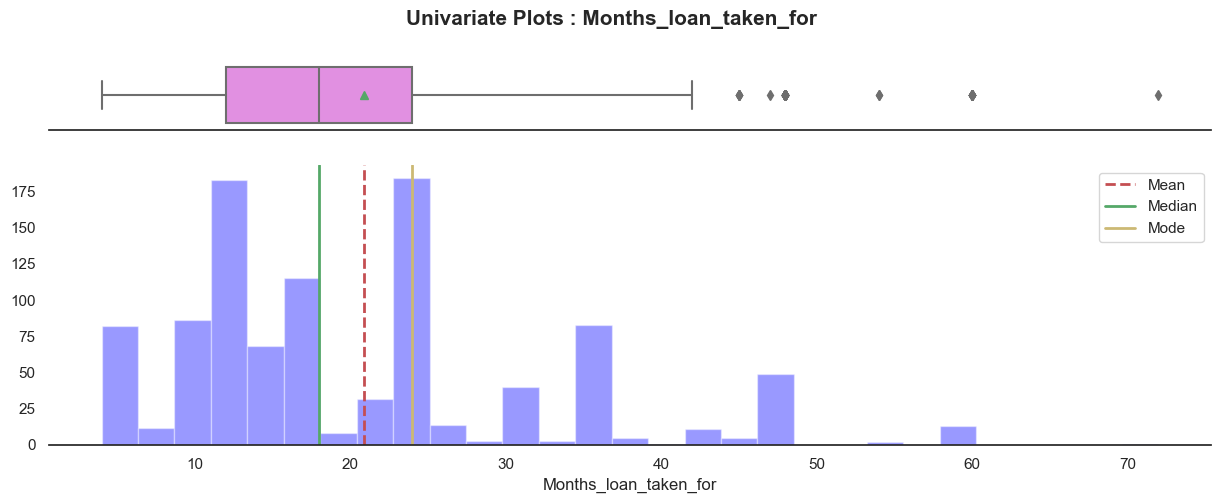

In [116]:
num_f =  ['Primary_applicant_age_in_years','Principal_loan_amount','Months_loan_taken_for' ]
for i in range(len(num_f)):
    univariate(df[num_f[i]])

In [118]:
df['Months_loan_taken_for'].value_counts().nlargestgest(3)

24    184
12    179
18    113
Name: Months_loan_taken_for, dtype: int64

##### Observations:

- Age and amount of loan taken has right skewed.
- There is no particular pattern observed in months of loan taken. Repeating pattern Observed, which means most applicants took loan for 12, 18, 24 months

### EDA | Univariate Analysis - Categorical Variables

Before we proceed with this analysis, it it better to readjust some of the categorical features into specific bins or segments for better analysis. This is done as below -

##### Converting Age into Bins:

It is always a good plan to convert age into bins and see the pattern. These bins can also be generation specific when applicable ( Millionaire, baby boomers etc.), but here we'll just go with numerical bins.

In [119]:
# Use cut when you need to segment and sort data values into bins.

df['Age_bins'] = pd.cut(df['Primary_applicant_age_in_years'], bins = [0, 30, 40, 50, 60, 100], 
                                  labels = ['18-30', '31-40', '41-50', '51-60', '60-100'])
df['Age_bins'].value_counts()

18-30     411
31-40     315
41-50     161
51-60      68
60-100     45
Name: Age_bins, dtype: int64

Age group 18-30 has maximum loan takes and age group 60-100 takes minimum loan. 

<Axes: >

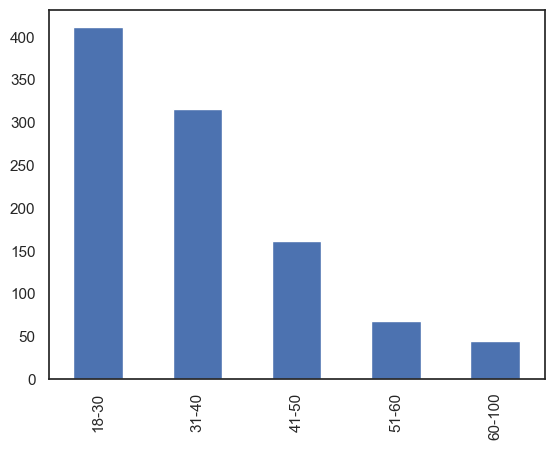

In [120]:
df['Age_bins'].value_counts().plot(kind='bar')

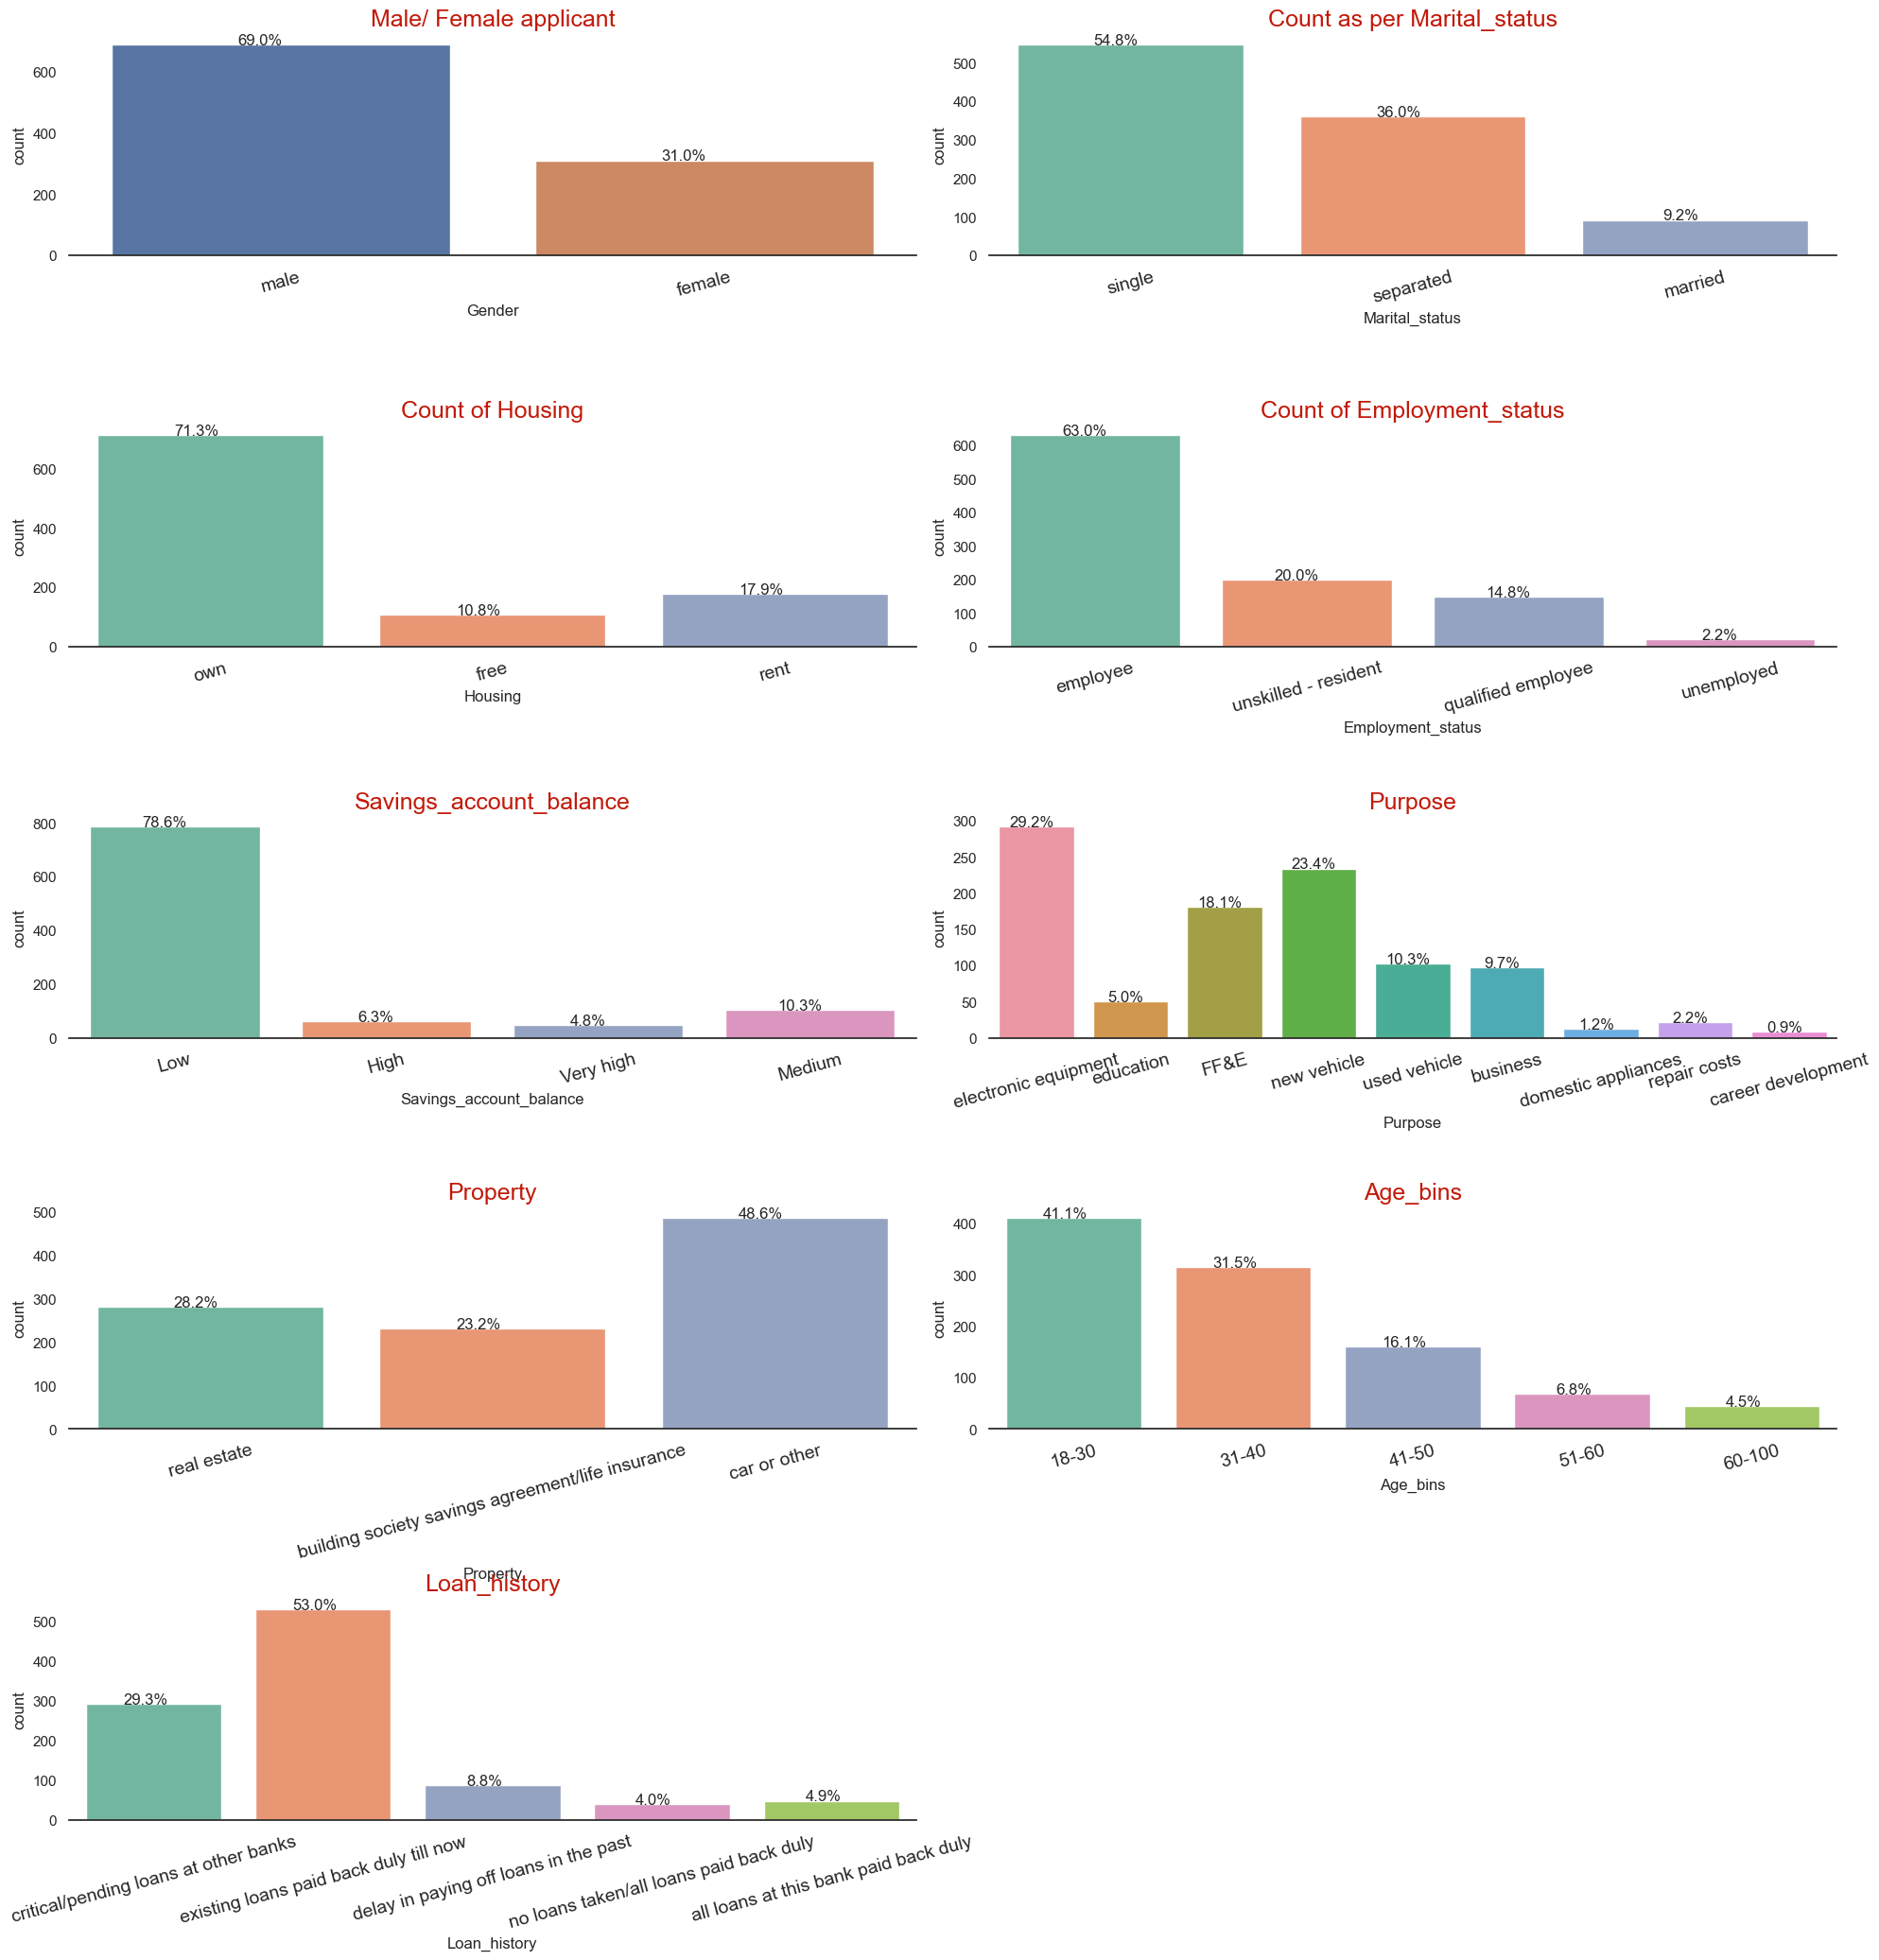

In [121]:
cat_cols = ['Gender', 'Marital_status', 'Housing', 'Employment_status',
       'Savings_account_balance', 'Purpose', 'Property', 'Age_bins','Loan_history']    
                                                                   # list of all categorical features
titles=['Male/ Female applicant', 'Count as per Marital_status', 'Count of Housing', 'Count of Employment_status',
       'Savings_account_balance', 'Purpose', 'Property','Age_bins', 'Loan_history' ]
                                                                  # List of plot titles for better understanding of plot
8
plt.figure(figsize=(20,20))

sns.set_theme(style="white")                                      # white background

for i, variable in enumerate(cat_cols):
                    plt.subplot(5,2,i+1)                          # Adjusting logic for subplots  

                    ax=sns.countplot(x=df[variable], data=df ) # plot countplot
                
                    sns.set_palette('Set2')                       # setting theme
                    sns.despine(top=True,right=True,left=True)    # remove unnecessary boundaries
                        
                    for p in ax.patches:                          # using matplotlib axes object to show %s
                        percentage = '{:.1f}%'.format(100 * p.get_height()/len(df[variable]))
                        x = p.get_x() + p.get_width() / 2 - 0.05
                        y = p.get_y() + p.get_height()
                        plt.annotate(percentage, (x, y),ha='center')
                        
                    plt.tight_layout()
                    plt.title(titles[i],size = 18, color = '#C21A0A')
                    plt.xticks(rotation=15,size=14)
                              

**Insights**

- Almost 70% male are applying for a loan while 30% are females.
- More than half of applicant are singe and only 9% are married. 
- Almost 3/4th of applicant having own house.
- Majority of applicant are well skill employed.
- Applicant apply for loan having low account balance and which is more than 3/4th of all applications. 
- Common pattern observed in applying for loan is for more in electronic equipments and new vehicle and Less in career development and education loan.  
- Applicant having loan history pending loan at other bank and existing loan paid back are more interested to applying for loan while no loan taken and all loan paid back ate very less.
- Applicant having age between 18-40 are almost 3/4th of all applicant, which is good. 


###  EDA | Bivariate & Multivariate Analysis <a id='id4e'></a>


In [122]:
df.columns

Index(['applicant_id', 'Primary_applicant_age_in_years', 'Gender',
       'Marital_status', 'Number_of_dependents', 'Housing',
       'Years_at_current_residence', 'Employment_status',
       'Has_been_employed_for_at_least', 'Foreign_worker',
       'Savings_account_balance', 'Has_been_employed_for_at_least (year)',
       'Months_loan_taken_for', 'Purpose', 'Principal_loan_amount',
       'EMI_rate_in_percentage_of_disposable_income', 'Property',
       'Has_coapplicant', 'Has_guarantor',
       'Number_of_existing_loans_at_this_bank', 'Loan_history',
       'high_risk_applicant', 'Age_bins'],
      dtype='object')

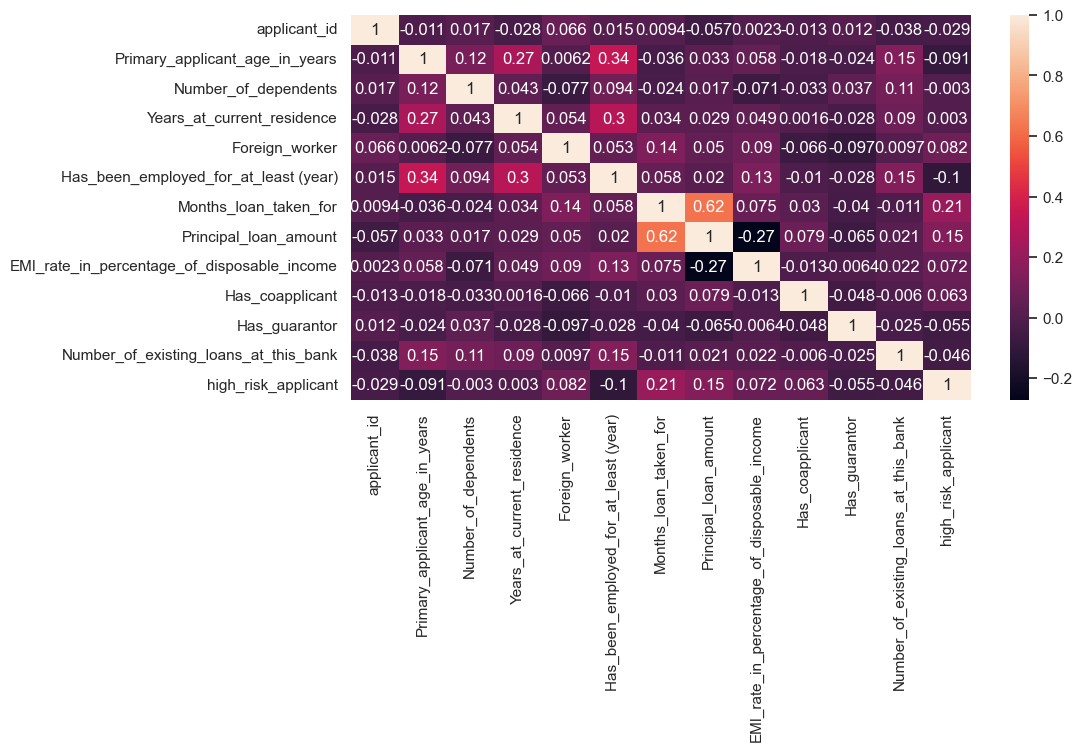

In [123]:
sns.set_palette(sns.color_palette("Set2"))
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [126]:
df.select_dtypes(include=int).columns

Index(['applicant_id', 'Primary_applicant_age_in_years',
       'Number_of_dependents', 'Years_at_current_residence', 'Foreign_worker',
       'Has_been_employed_for_at_least (year)', 'Months_loan_taken_for',
       'Principal_loan_amount', 'EMI_rate_in_percentage_of_disposable_income',
       'Has_coapplicant', 'Has_guarantor',
       'Number_of_existing_loans_at_this_bank', 'high_risk_applicant'],
      dtype='object')

##### Bivariate Analysis - Boxplot comparison of Numerical Feature(s) vs Target

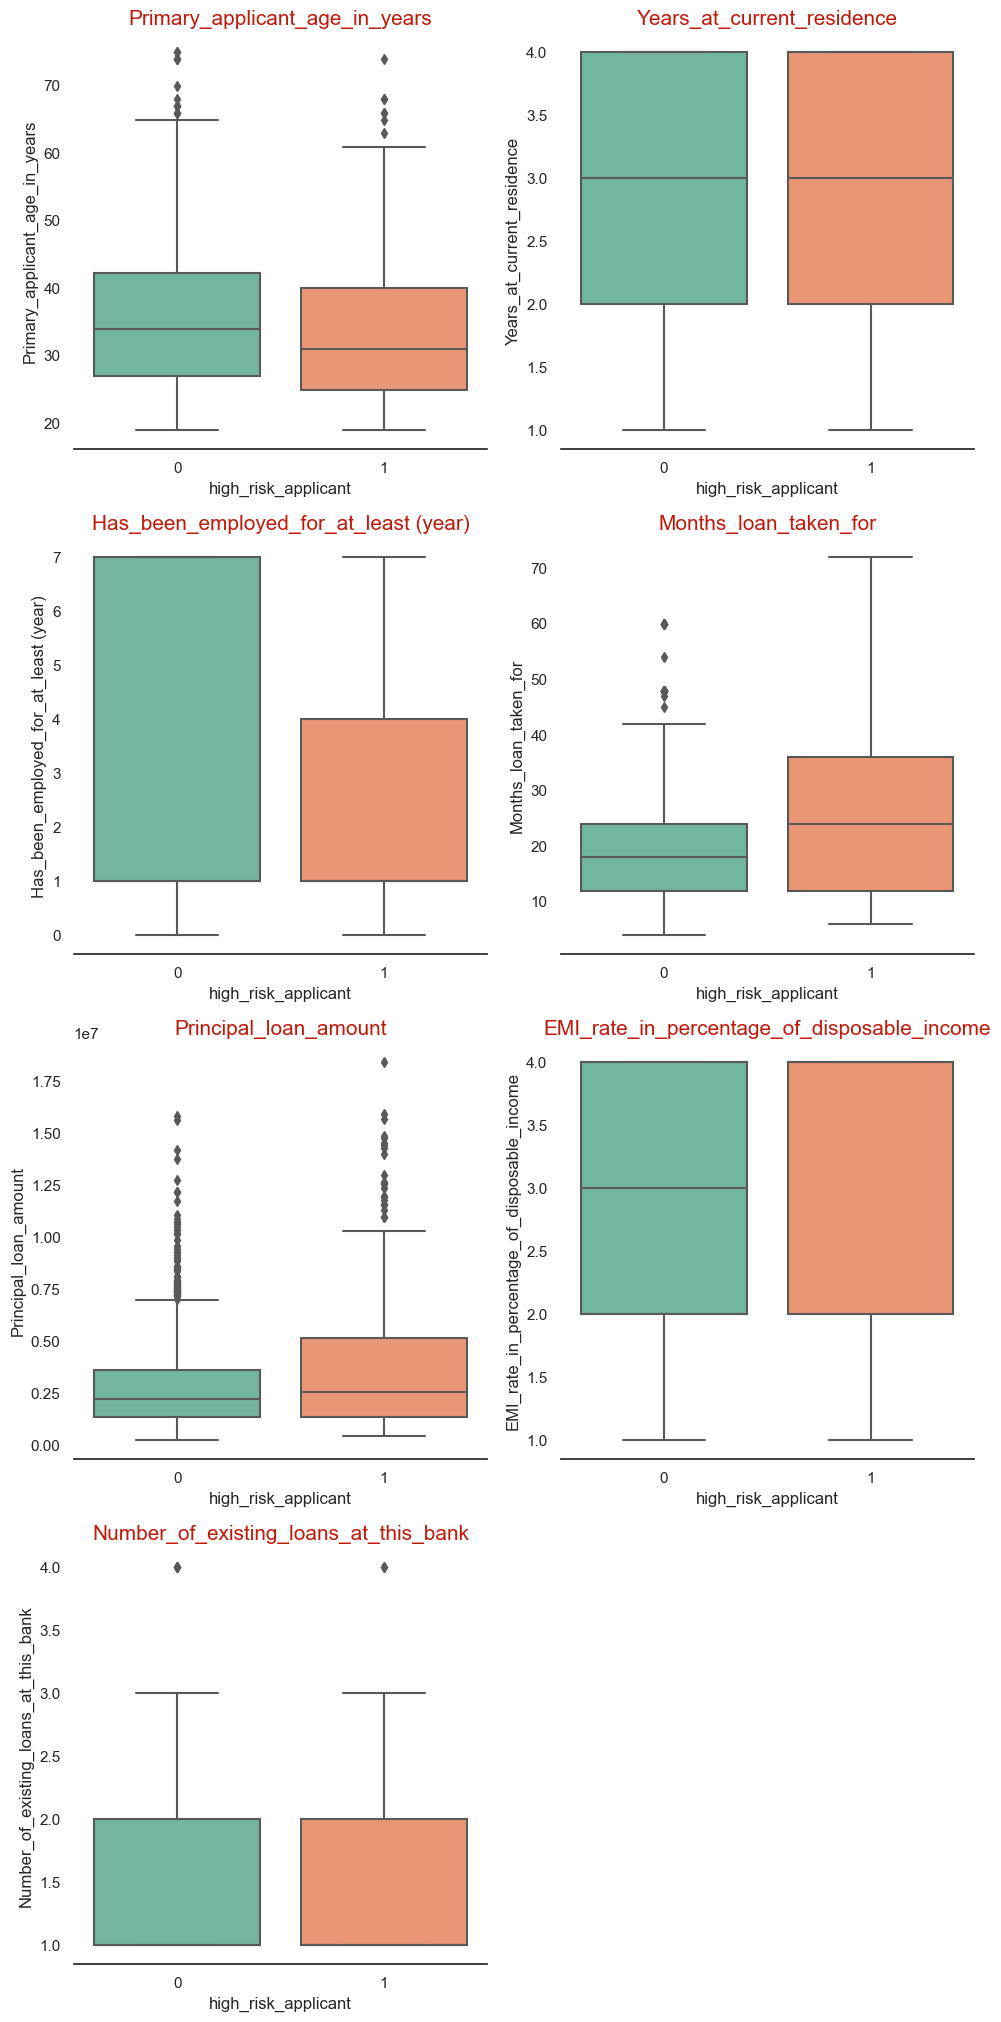

In [127]:
num_cols = [
    'Primary_applicant_age_in_years', 'Years_at_current_residence',
    'Has_been_employed_for_at_least (year)', 'Months_loan_taken_for',
    'Principal_loan_amount', 'EMI_rate_in_percentage_of_disposable_income',
    'Number_of_existing_loans_at_this_bank']
plt.figure(figsize=(10,30))

sns.set_palette(sns.color_palette("Set2", 10))
for i, variable in enumerate(num_cols):
    plt.subplot(6, 2, i + 1)

    sns.boxplot(x='high_risk_applicant', y=df[variable], data=df)
    sns.despine(top=True, right=True, left=True)
    plt.tight_layout()
    plt.title(variable, c='#C21A0A', size=15)

**Insights-**
- Age, current residance, EMI rate and number of existing loan don't seem to impact our target variable.
- People with principal loan amount have slighty wider distribution, but overall impact is not significant. 
- Target observed higher month of loan taken, higher the risk.

##### Bivariate Analysis - Displot comparison of Numerical Column vs Target
Creating function for same:

In [57]:
def dist_plot(col):
    
    plt.figure(figsize=(15,5))
    sns.distplot( df[df['high_risk_applicant'] == 0][col], color = 'g')
    sns.distplot( df[df['high_risk_applicant'] == 1][col], color = 'b')
    sns.despine(top=True,right=True,left=True)
    plt.title('Distribution between high_risk_applicant vs {} '.format(col), size=15, c='#C21A0A')
   
    return plt.show()

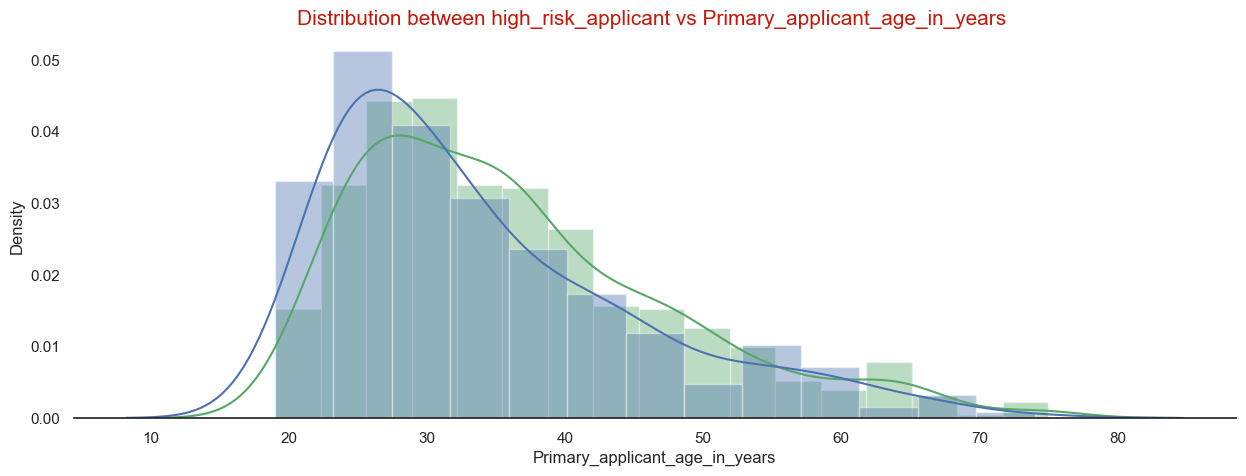

In [58]:
dist_plot('Primary_applicant_age_in_years')

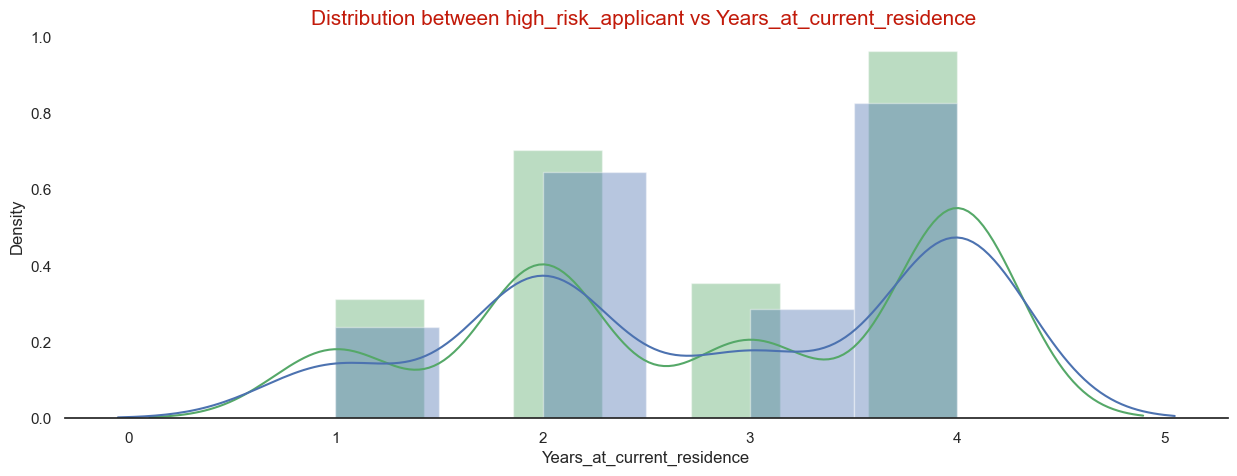

In [59]:
dist_plot('Years_at_current_residence')

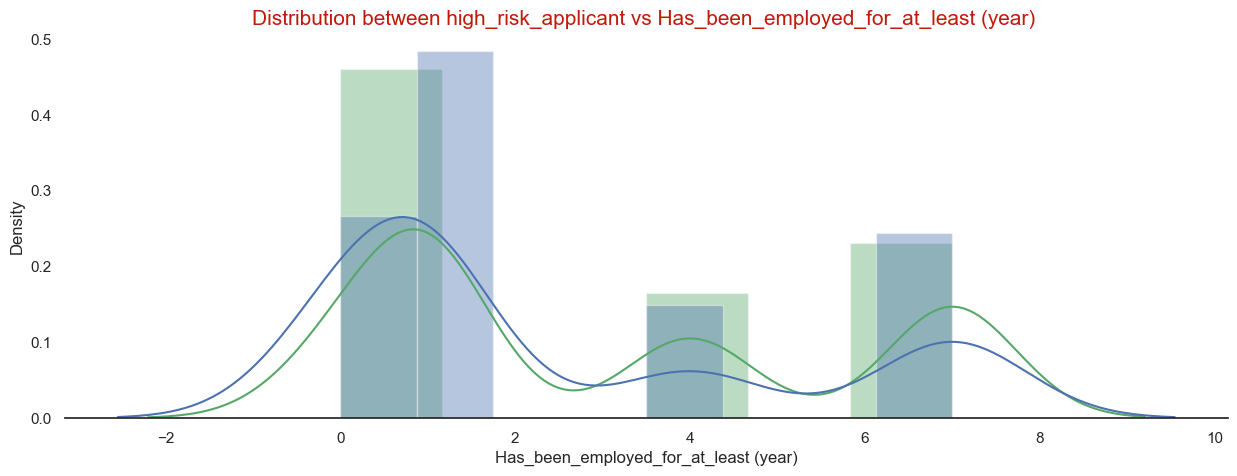

In [60]:
dist_plot('Has_been_employed_for_at_least (year)')

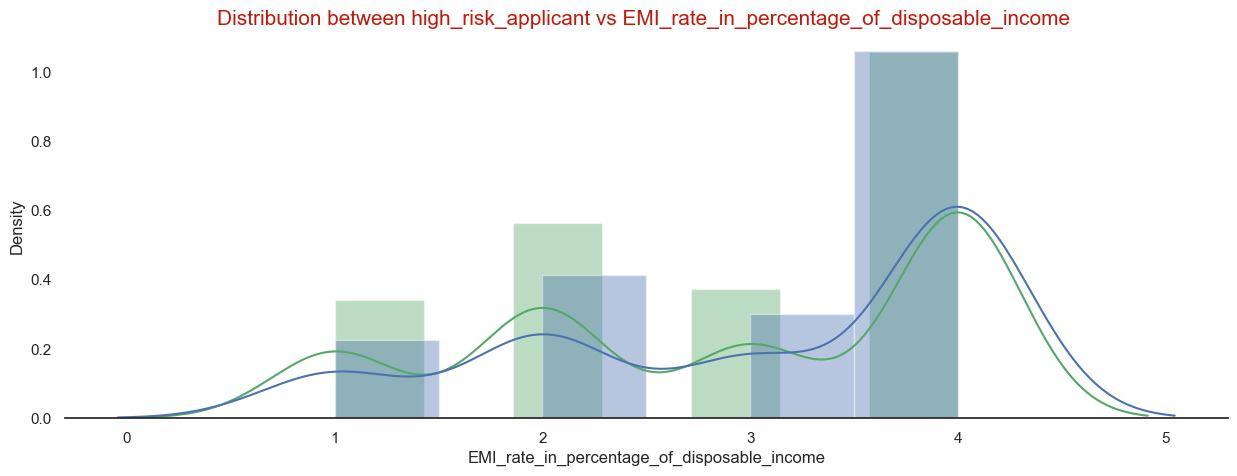

In [62]:
dist_plot('EMI_rate_in_percentage_of_disposable_income')

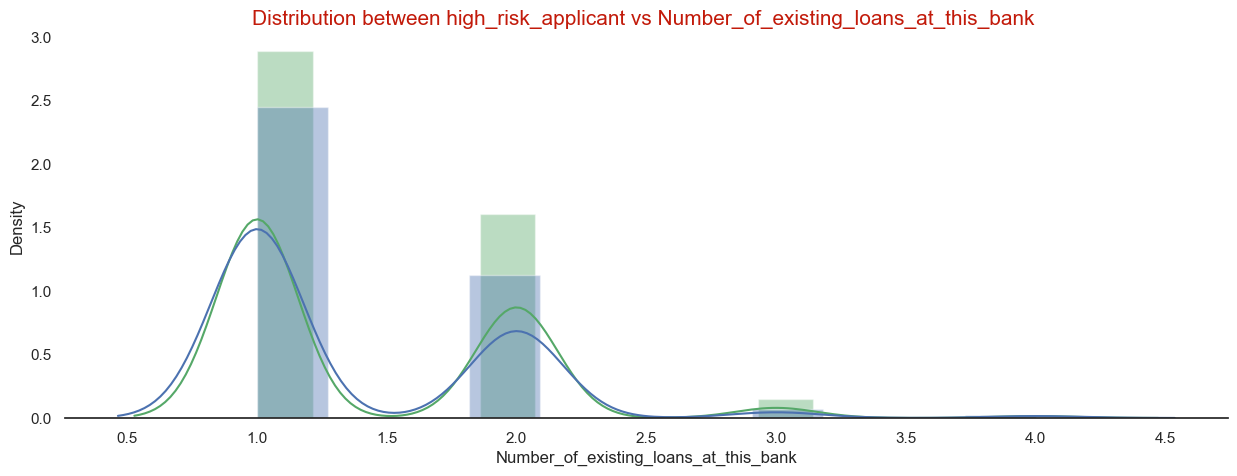

In [128]:
dist_plot('Number_of_existing_loans_at_this_bank')

##### Bivariate Analysis | Stacked Bars - Categorical Feature(s) vs Target 

In [167]:
# Defining function to plot Stacked bar of Categorical Feature vs Target ( 0 & 1)

def stacked_bar_plot(x):
    
    # Displaying data
    sns.set_palette(sns.color_palette("Set2", 10))                     # Color theme
    tab1 = pd.crosstab(x,df['high_risk_applicant'],margins=True)       # Calculate count of 0s and 1s in Target for a feature
    print('************************************************')           
    print('Feature : ' + str(variable))                                # To display Feature
    print(tab1)                                                        # To display crosstab data related to Feature and Target
    print('-'*120)                                                     # Seperating line
    
    # Plotting Stack Bar
    tab = pd.crosstab(x,df['high_risk_applicant'],normalize='index') # Again calculating crosstab data for plot, 
                                                                          #this time normalising it over rows 
    tab.plot(kind='bar',stacked=True,figsize=(7,5), )
    plt.xticks(rotation=18)
    labels=["No","Yes"]
    plt.legend(loc='lower left', frameon=False,)
    plt.legend(loc="upper left", labels=labels,title="Risk ?",bbox_to_anchor=(1,1))
    
    
    sns.despine(top=True,right=True,left=True)
    plt.show()

************************************************
Feature : Gender
high_risk_applicant    0    1   All
Gender                             
female               201  109   310
male                 499  191   690
All                  700  300  1000
------------------------------------------------------------------------------------------------------------------------


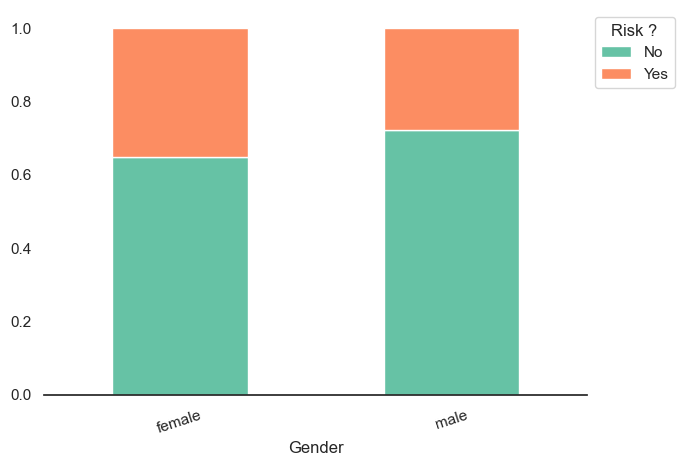

************************************************
Feature : Marital_status
high_risk_applicant    0    1   All
Marital_status                     
married               67   25    92
separated            231  129   360
single               402  146   548
All                  700  300  1000
------------------------------------------------------------------------------------------------------------------------


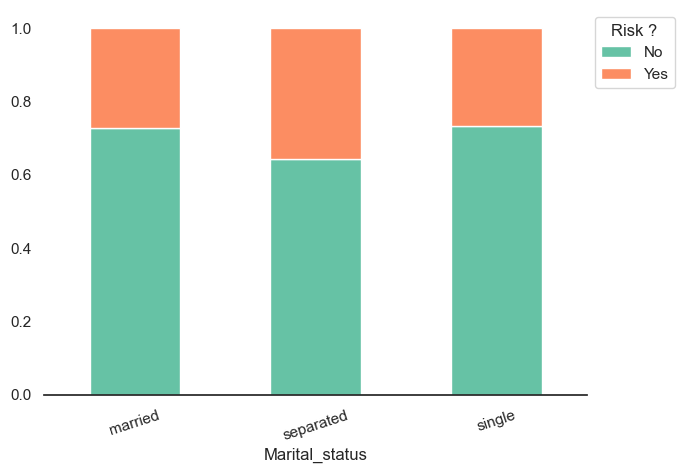

************************************************
Feature : Housing
high_risk_applicant    0    1   All
Housing                            
free                  64   44   108
own                  527  186   713
rent                 109   70   179
All                  700  300  1000
------------------------------------------------------------------------------------------------------------------------


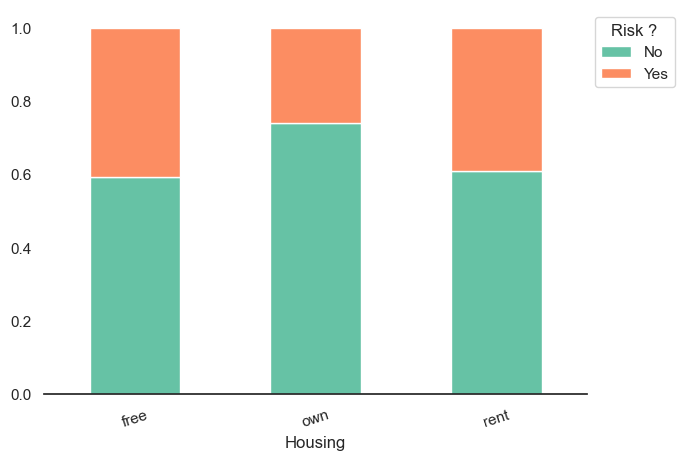

************************************************
Feature : Employment_status
high_risk_applicant     0    1   All
Employment_status                   
employee              444  186   630
qualified employee     97   51   148
unemployed             15    7    22
unskilled - resident  144   56   200
All                   700  300  1000
------------------------------------------------------------------------------------------------------------------------


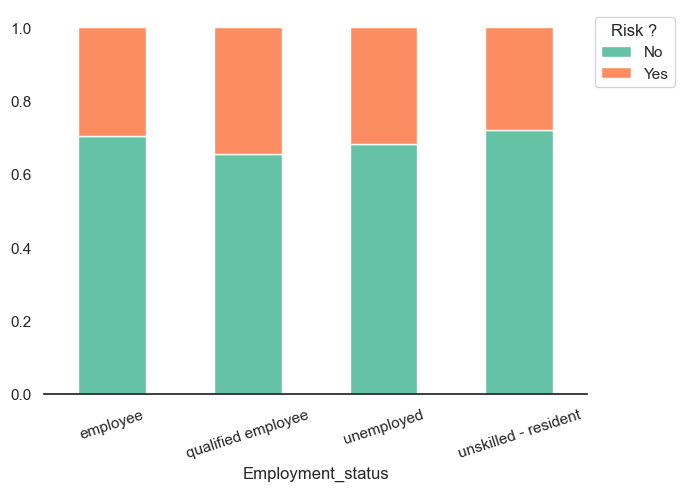

************************************************
Feature : Savings_account_balance
high_risk_applicant        0    1   All
Savings_account_balance                
High                      52   11    63
Low                      537  249   786
Medium                    69   34   103
Very high                 42    6    48
All                      700  300  1000
------------------------------------------------------------------------------------------------------------------------


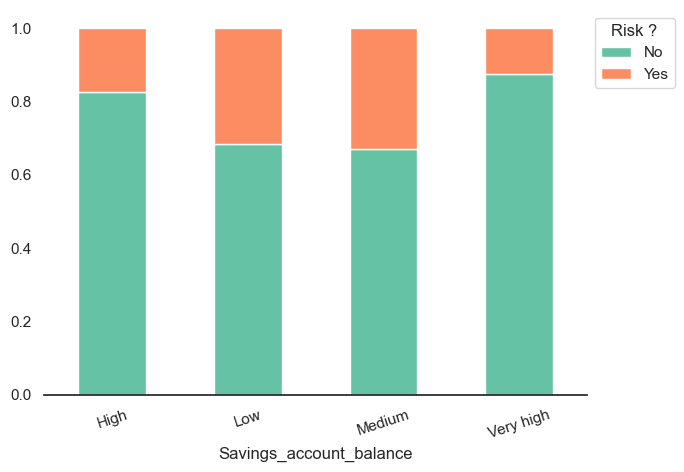

************************************************
Feature : Purpose
high_risk_applicant     0    1   All
Purpose                             
FF&E                  123   58   181
business               63   34    97
career development      8    1     9
domestic appliances     8    4    12
education              28   22    50
electronic equipment  225   67   292
new vehicle           145   89   234
repair costs           14    8    22
used vehicle           86   17   103
All                   700  300  1000
------------------------------------------------------------------------------------------------------------------------


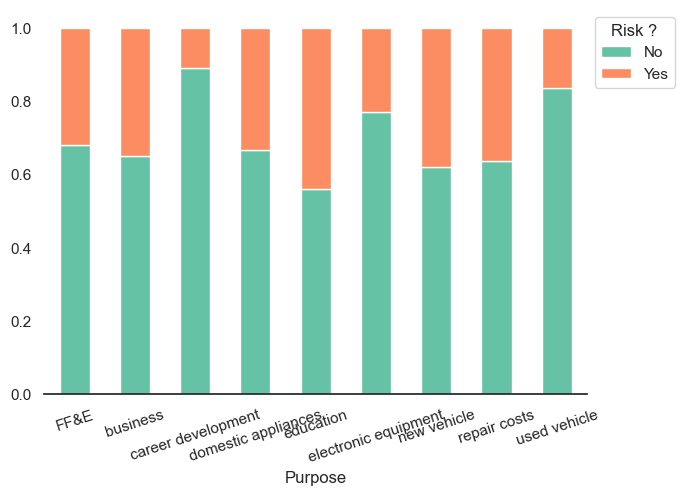

************************************************
Feature : Property
high_risk_applicant                                  0    1   All
Property                                                         
building society savings agreement/life insurance  161   71   232
car or other                                       317  169   486
real estate                                        222   60   282
All                                                700  300  1000
------------------------------------------------------------------------------------------------------------------------


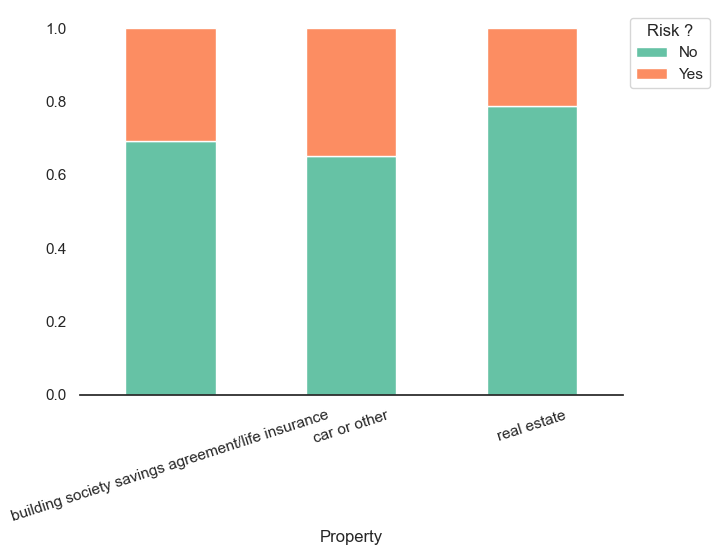

************************************************
Feature : Age_bins
high_risk_applicant    0    1   All
Age_bins                           
18-30                263  148   411
31-40                235   80   315
41-50                120   41   161
51-60                 47   21    68
60-100                35   10    45
All                  700  300  1000
------------------------------------------------------------------------------------------------------------------------


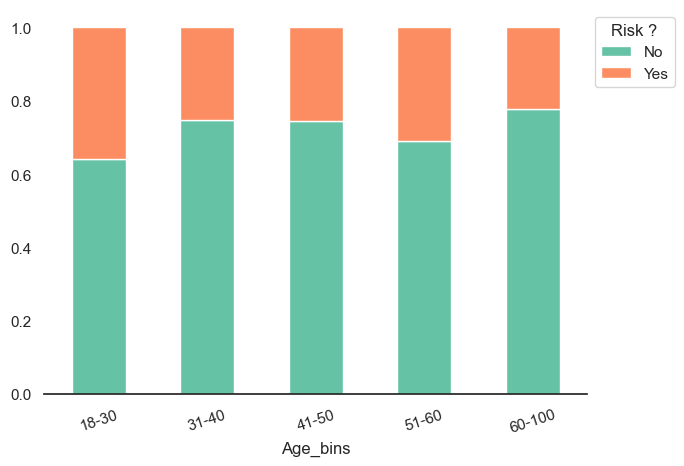

************************************************
Feature : Loan_history
high_risk_applicant                        0    1   All
Loan_history                                           
all loans at this bank paid back duly     21   28    49
critical/pending loans at other banks    243   50   293
delay in paying off loans in the past     60   28    88
existing loans paid back duly till now   361  169   530
no loans taken/all loans paid back duly   15   25    40
All                                      700  300  1000
------------------------------------------------------------------------------------------------------------------------


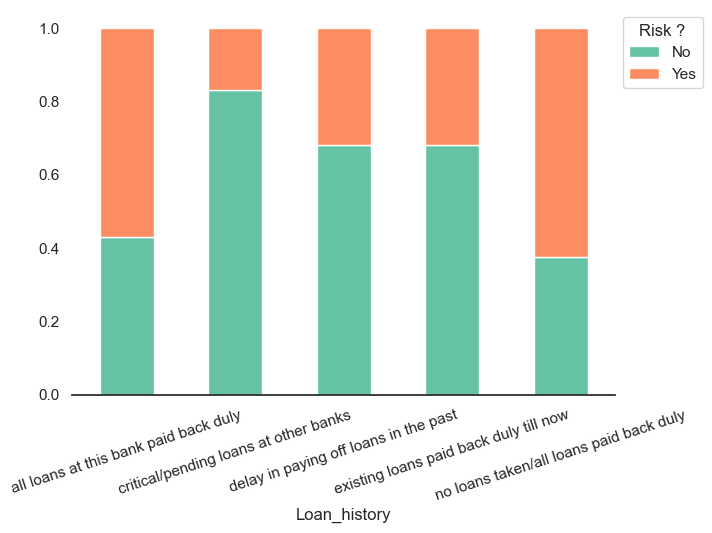

In [168]:
for i, variable in enumerate(cat_cols):
       stacked_bar_plot(df[variable])

**Insights - Stacked Bars**

- Female applicant slightly risky male applicant.
- Customers having a marital status is single have slightly higher chance of payback a loan as well.
- Applicant having own house shows that less risk of paying back the loan than other applicant.
- Applicant with Employment status show equal chance of paying back the loan.
- Applicant with low saving account balance having higher risk in paying back the loan.
- Applicant with education purpose seems higher the risk in paying back the loan than other.
- Applicant with loan history no loan taken/ all loan paid back duly has high risk.



**Knowing Data:**

* Target column is high_risk_applicant (categorical datatype).
* We have following continuous features - Age, Amount of loan.
* No duplicate values in the data.

**Data Cleaning:**

* Experience had some null values which were treated by taking mode/mean.
* Primary_applicant_age_in_years divide into categories for batter understanding. 

**Tentative Profiling for Customer segmentation-**

 - Most Risky Applicaant : Applicant with gender- male, purpose- education and loan history- no loan taken/ all loan paid back duly are more risky. Also Saving Balance is low. 
 - Likely Risky Applicaant : Applicant with employment status, property. 
 - Unlikely Risky Applicaant : Rest of the Applicant.


In [169]:
# Task 2: ML Model